In [1]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_data(n):
    file_path = "./Handwriting_styler_data/"
    pages = []
    for i in range(n):
        page = Image.open(file_path + "Handwriting_styler_data-{}.jpg".format(i+1))
        pages.append(page)
    return pages

In [3]:
def page_to_LetterSet(page):
    page = page.crop(box=(4, 575, 1663, 1615))
    upper_set = page.crop((0, 0, 1659, 520-2))
    lower_set = page.crop((0, 520+2, 1659, 1040))
    return upper_set, lower_set

In [4]:
def letterset_to_letter(LetterSet, i, j, size=(32, 32)):
    letter = LetterSet.crop((j * 237 + 20, i * 260 + 20, (j+1) * 237 - 20, (i+1) * 260 - 20))
    letter = letter.resize(size)
    letter = ImageOps.invert(letter)
    return letter

In [5]:
def LetterSet_to_list(upper_set, lower_set):
    dataz = []
    for i in range(2):
        for j in range(7):
            letter = letterset_to_letter(upper_set, i, j)
            letter = np.asarray(letter)
            letter = letter[:, :, 0]
            dataz.append(letter)
    for i in range(2):
        for j in range(7):
            letter = letterset_to_letter(lower_set, i, j)
            letter = np.asarray(letter)
            letter = letter[:, :, 0]
            dataz.append(letter)
    return np.array(dataz)

In [6]:
def show_letter(LetterSet):
    plt.figure(figsize=(18, 6))
    for i in range(2):
        for j in range(7):
            letter = letterset_to_letter(LetterSet, i, j)
            plt.subplot(2, 7, (i*7)+j+1)
            plt.imshow(letter)
            plt.grid()
    plt.show()

In [7]:
def data_preprocess(pages_num):
    pages = get_data(pages_num)
    print("Got {} pages of data.".format(pages_num))
    print("Raw Page size:", pages[0].size)
    
    all_dataz = []
    
    for i in range(pages_num):
        upper_set, lower_set = page_to_LetterSet(pages[i])
        dataz = LetterSet_to_list(upper_set, lower_set)
        all_dataz.extend(dataz)
        
    return np.array(all_dataz)

In [18]:
def all_image_show(pages_num):
    plt.figure(figsize=(18, 6*pages_num*2))
    for i in range(2*pages_num*2):
        for j in range(7):
            plt.subplot(2*pages_num*2, 7, (i*7)+j+1)
            plt.imshow(all_dataz[(i*7)+j], cmap='gray')
            plt.grid()
    plt.show()

In [9]:
pages = get_data(4)
print(len(pages))
print(pages[0].size)

4
(1668, 2157)


(1659, 518)


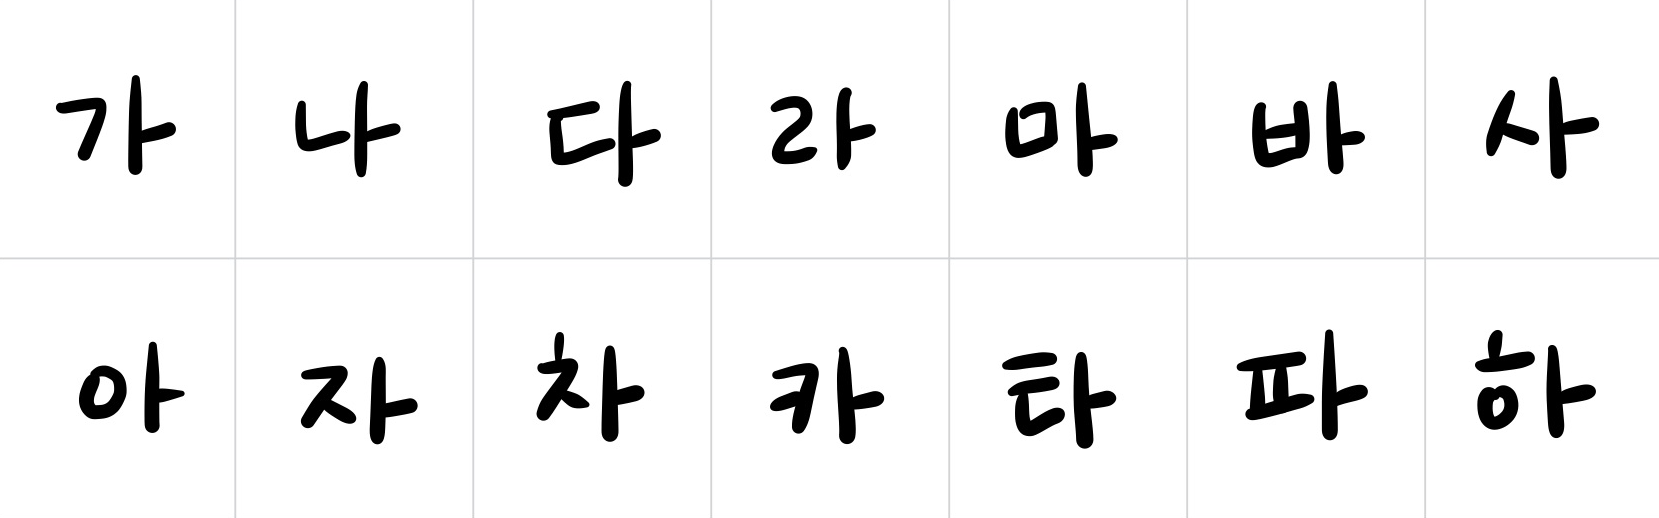

In [10]:
upper_set, lower_set = page_to_LetterSet(pages[0])
print(upper_set.size)
upper_set

- 가로 : 1659 / 7 = `237`
- 세로 : 1040 / 4 = `260`

In [11]:
letterset_list = LetterSet_to_list(upper_set, lower_set)
print(letterset_list.shape)

(28, 32, 32)


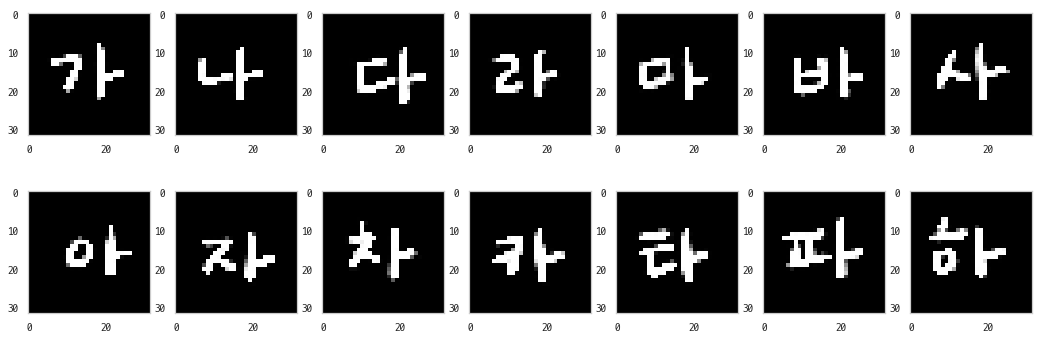

In [12]:
show_letter(upper_set)

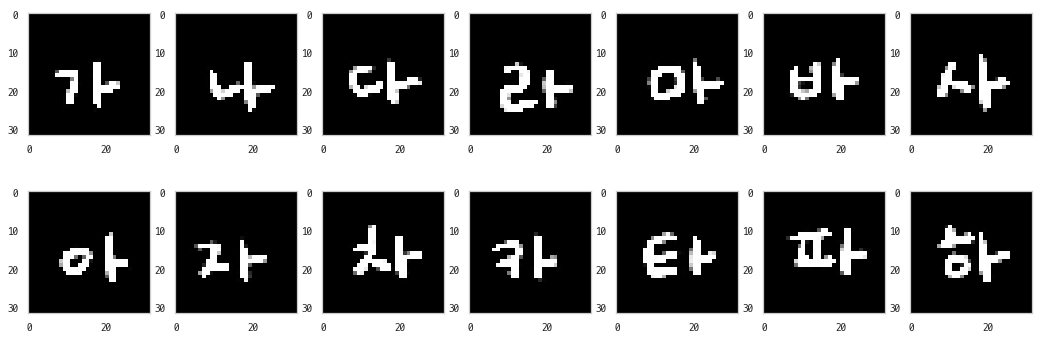

In [13]:
show_letter(lower_set)

---

In [14]:
pages_num = 4
all_dataz = data_preprocess(pages_num)
all_dataz.shape

Got 4 pages of data.
Raw Page size: (1668, 2157)


(112, 32, 32)

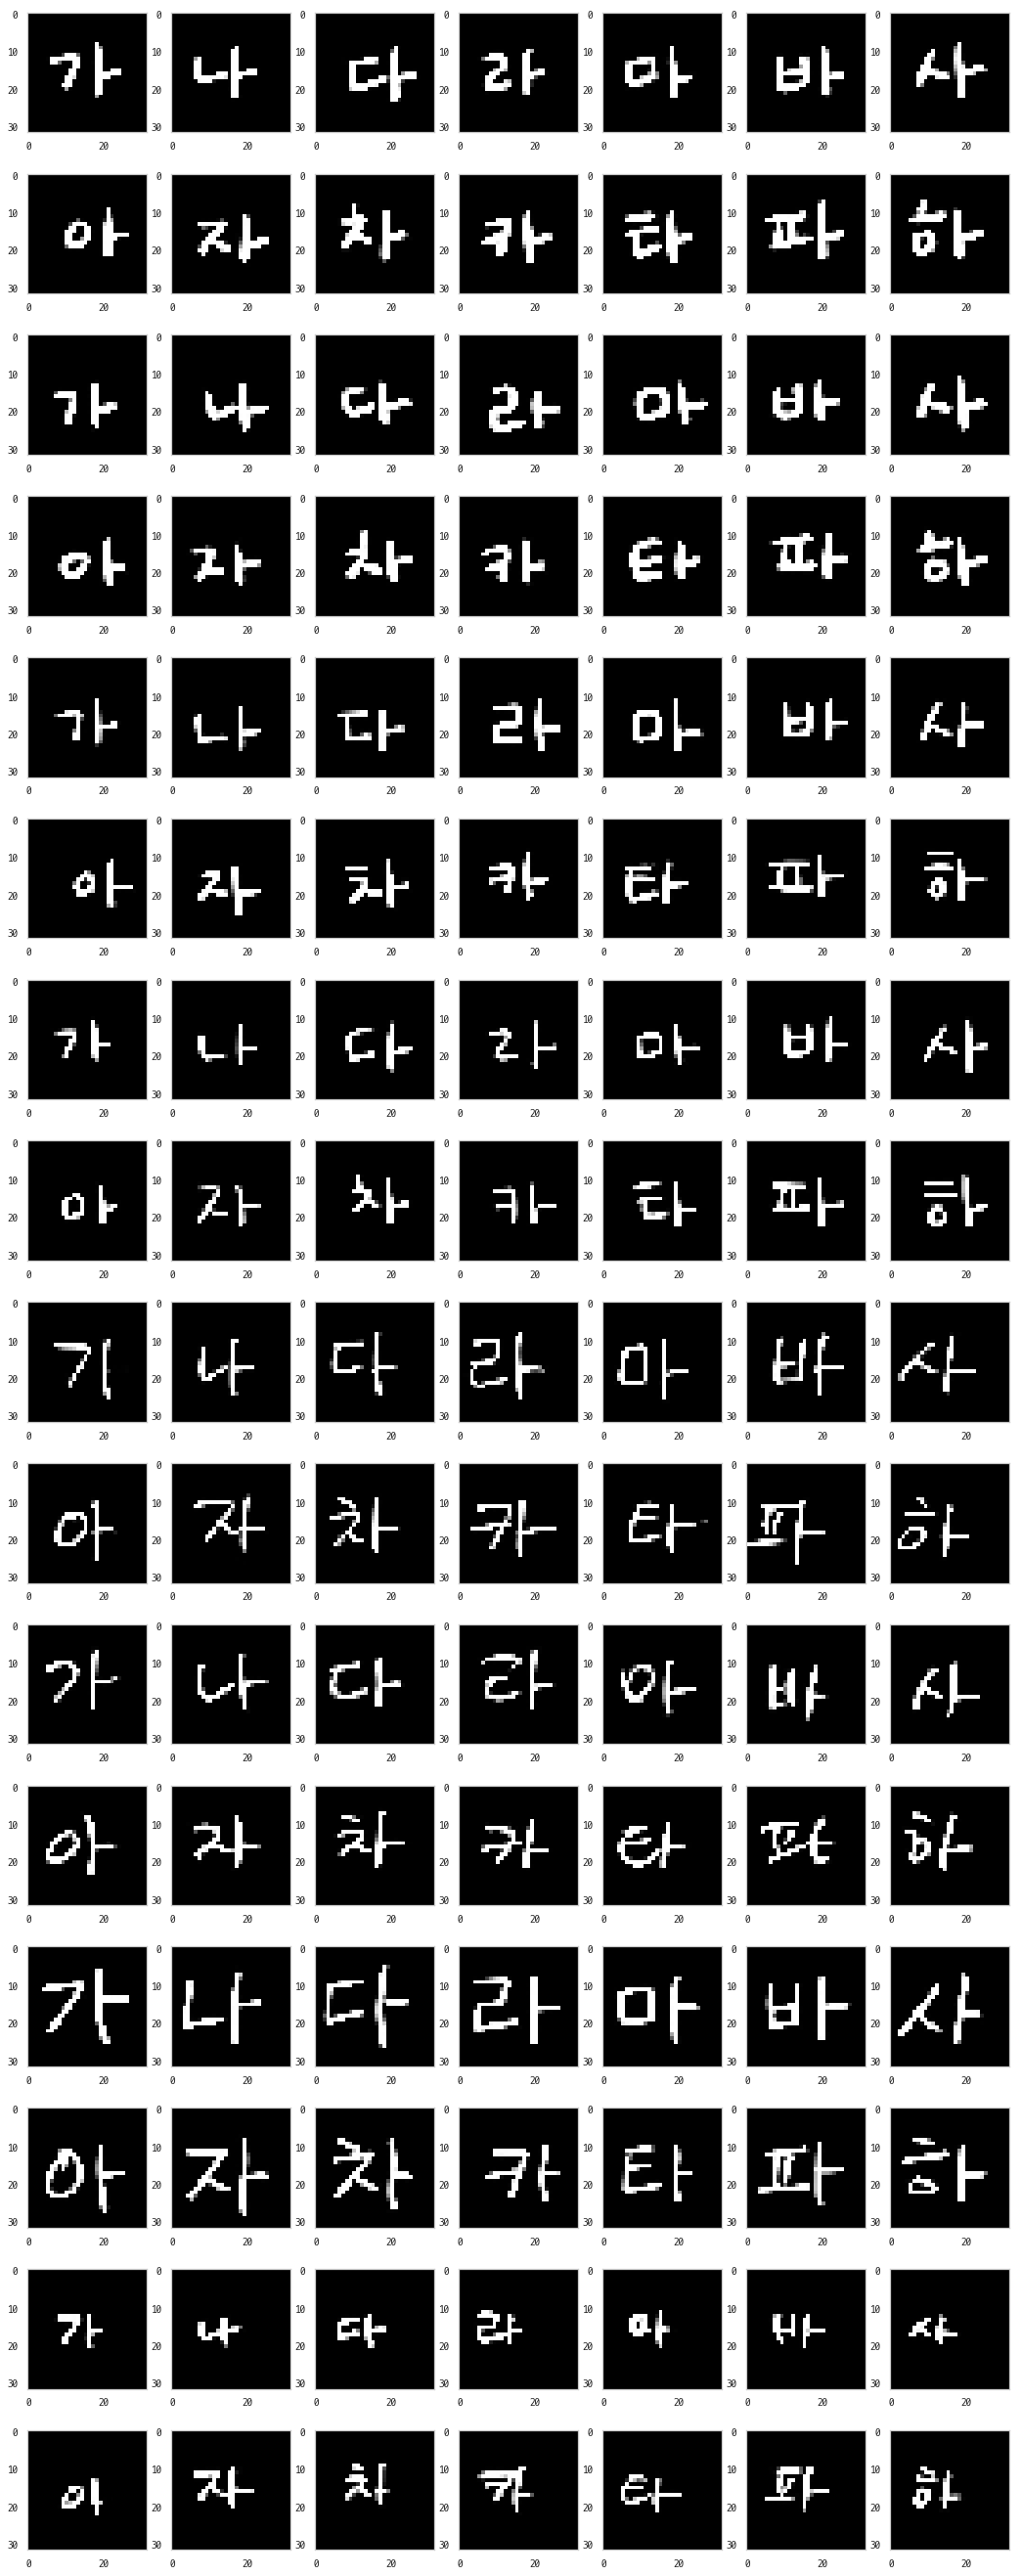

In [19]:
all_image_show(4)